<a href="https://colab.research.google.com/github/YerinS/Yerin_Portfolio/blob/main/DL_WeightPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DL Regression] Weight Prediction


- 　__Data__ 　　　　　　　body measurements of 167,980 soldiers in Korea<br/>
- 　__Features__ 　　　　　chest, arm, height, waist, inner leg, head, feet<br/>
- 　__Label__ 　 　　　 　　weight<br/>
- 　__Validation MAE__　　 0.0260<br/>
- 　__Data Source__ 　 　　 Military Manpower Administration (https://open.mma.go.kr/caisGGGS/)<br/>
- 　__DL Framework__ 　 　 Keras<br/>
- 　__Packages__ 　 　 　 　Pandas, NumPy, Matplotlib, TensorFlow v2.7<br/>
<br/>

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings("ignore")

# 1. Get Data

- Download data from https://open.mma.go.kr/caisGGGS

In [2]:
from google.colab import files
file = files.upload()

Saving 육군신체측정정보.csv to 육군신체측정정보.csv


In [3]:
df = pd.read_csv('육군신체측정정보.csv', usecols=[2, 3, 4, 5, 6, 7, 8, 9], encoding='cp949')
df.columns = ['chest', 'arm', 'height', 'waist', 'leg', 'head', 'feet', 'weight']
df.head()

,chest,arm,height,waist,leg,head,feet,weight
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


# 2. Clean, Prepare & Manipulate Data

- Clean data

In [4]:
df['waist']

0                   82.5
1                   81.2
2                   99.2
3                   85.9
4                   78.3
               ...      
167975    86.7 (34.1 in)
167976    90.5 (35.6 in)
167977    94.3 (37.1 in)
167978    75.9 (29.9 in)
167979    73.0 (28.7 in)
Name: waist, Length: 167980, dtype: object

In [5]:
waist = df['waist'].loc[135669:].str.split(" ", expand=True)
df['waist'].loc[135669:] = waist[0]
df.tail()

,chest,arm,height,waist,leg,head,feet,weight
167975,100.6,86.4,173.2,86.7,77.1,56.9,27.1,73.7
167976,97.9,82.7,166.3,90.5,73.4,61.5,28.8,70.7
167977,97.9,87.2,175.2,94.3,83.1,57.1,27.6,78.7
167978,85.3,86.8,173.6,75.9,76.6,57.6,24.3,57.4
167979,86.6,88.3,175.8,73.0,77.8,56.3,26.1,51.7


In [6]:
df.isnull().sum()

chest     0
arm       0
height    0
waist     0
leg       0
head      0
feet      0
weight    0
dtype: int64

- Remove outliers

In [7]:
head_outlier = df.index[df['head'] > 100].tolist()
leg_outlier = df.index[df['leg'] < 10].tolist()
feet_outlier = df.index[df['feet'] < 10].tolist()
weight_outlier = df.index[df['weight'] < 10].tolist()
outliers = head_outlier + leg_outlier + feet_outlier + weight_outlier
print(outliers)

[149786, 101680, 111533, 149778, 149796, 149761, 149778, 149786, 149789, 149793, 149795, 149796, 149797, 149798, 149799, 149800, 149828, 149829, 149830, 149831, 149832, 149834, 149835, 149836, 149844, 149852, 149860, 149861, 149862, 149863, 149864]


In [8]:
df = df.drop(df.index[outliers])

maxs = df.max()
mins = df.min()
print("MAX")
print(maxs)
print("\nMIN")
print(mins)

MAX
chest     139.9
arm        99.6
height    198.4
leg       103.7
head       63.9
feet       34.2
weight    135.0
dtype: float64

MIN
chest      75.0
arm        77.1
height    153.6
leg        68.0
head       52.0
feet       20.6
weight     40.1
dtype: float64


In [9]:
data = df.to_numpy()
data = data.astype(float)

- Normalize data

In [ ]:
normalized_data = data / np.max(data, axis=0)

- Split data

In [11]:
x, y = normalized_data.shape

x_train = normalized_data[:int(x * 0.8), :-1]
y_train = normalized_data[:int(x * 0.8), -1]
x_test = normalized_data[int(x * 0.8):, :-1]
y_test = normalized_data[int(x * 0.8):, -1]

print("Training X Size : " + str(x_train.shape))
print("Training Y Size : " + str(y_train.shape))
print("Test X Size : " + str(x_test.shape))
print("Test Y Size : " + str(y_test.shape))

Training X Size : (134361, 7)
Training Y Size : (134361,)
Test X Size : (33591, 7)
Test Y Size : (33591,)


# 3. Train Model

- Create neural network model using Keras

In [12]:
model = keras.Sequential([
    keras.layers.Dense(3),    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="mse", metrics=['mae'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20
4199/4199 [==============================] - 14s 3ms/step - loss: 0.0024 - mae: 0.0360 - val_loss: 0.0016 - val_mae: 0.0295
Epoch 2/20
4199/4199 [==============================] - 12s 3ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 3/20
4199/4199 [==============================] - 13s 3ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 4/20
4199/4199 [==============================] - 12s 3ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 5/20
4199/4199 [==============================] - 13s 3ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 6/20
4199/4199 [==============================] - 18s 4ms/step - loss: 0.0012 - mae: 0.0262 - val_loss: 0.0012 - val_mae: 0.0260
Epoch 7/20
4199/4199 [==============================] - 12s 3ms/step - loss: 0.0012 - mae: 0.0260 - val_loss: 0.0013 - val_mae: 0.0266
Epoch 8/20
4199/4199 [==============================] -

- Visualize model

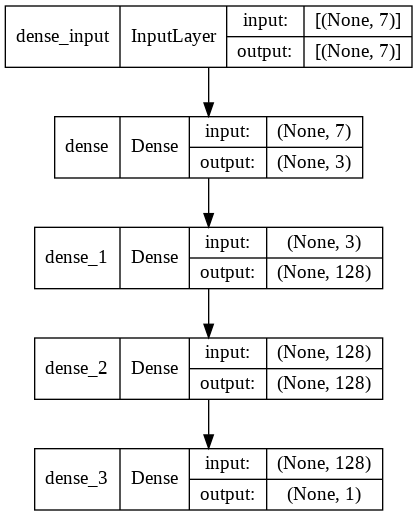

In [13]:
plot_model(model, 'model.png', show_shapes=True)

# 4. Evaluate Model 

- Visualize accuracy and loss history

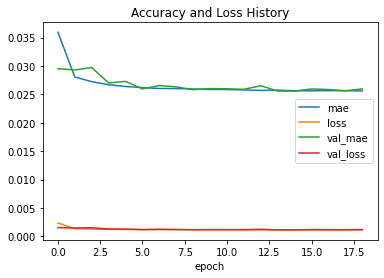

In [14]:
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_mae'], label='val_mae')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Accuracy and Loss History')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.savefig('result.png')
plt.show()

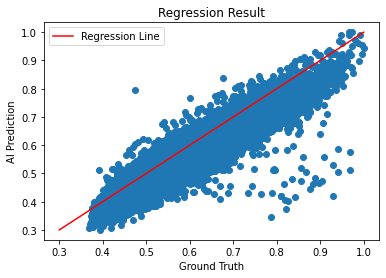

In [15]:
X = model(x_test) / np.max(model(x_test), axis=0)
Y = y_test / np.max(y_test, axis=0)

minval = min(np.min(X), np.min(Y))
maxval = max(np.max(X), np.max(Y))

plt.title("Regression Result")
plt.xlabel("Ground Truth")
plt.ylabel("AI Prediction")
plt.scatter(X, Y)
plt.plot([minval, maxval], [minval, maxval], "red", label='Regression Line') 
plt.legend()